In [99]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import calendar

In [100]:
df = pd.read_csv('cycling_activities.csv')

# show all the columns of df
pd.set_option("display.max_columns", None)

In [105]:
# converting columns into useful formats
df['Date'] = pd.to_datetime(df['Date'])
df['Time'].to_timestamp
df['Moving_Time'] = pd.to_timedelta(df['Moving_Time'])
df['Elapsed_Time'] = pd.to_timedelta(df['Elapsed_Time'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Month_num'] = pd.to_datetime(df['Date']).dt.month

In [106]:
df

,Unnamed: 0,Activity_Type,Date,Title,Distance,Calories,Time,Avg_HR,Max_HR,Aerobic_TE,Avg_Speed,Max_Speed,Total_Ascent,Total_Descent,Avg_Cadence,Max_Cadence,Normalized_Power,Training_Stress_Score,Max_Avg_Power(20min),Avg_Power,Max_Power,Total_Strokes,Min_Temp,Moving_Time,Elapsed_Time,Min_Elevation,Max_Elevation,Bike,Year,Month,Month_num
0,0,Gravel/Unpaved Cycling,2022-10-08 11:47:00,just an autumn easy spin,41.90,906.0,0 days 01:42:42,126,169,2.5,24.5,44.2,166,158,0,0,0,0.0,0,0,0,0,14.0,0 days 01:42:30,0 days 01:46:00,194,255,Bergamont,2022,October,10
1,1,Cycling,2022-10-05 11:24:00,Prague Cycling,13.75,328.0,0 days 00:37:29,125,143,0.0,22.0,43.1,43,39,0,0,0,0.0,0,0,0,0,0.0,0 days 00:37:23,0 days 00:37:29,185,208,unknown,2022,October,10
2,2,Cycling,2022-10-05 09:51:00,Prague Cycling,13.45,415.0,0 days 00:40:12,133,153,0.0,20.1,34.3,51,60,0,0,0,0.0,0,0,0,0,0.0,0 days 00:39:02,0 days 00:40:12,188,210,unknown,2022,October,10
3,3,Gravel/Unpaved Cycling,2022-10-01 10:09:00,Gravel series Ralsko,58.96,2657.0,0 days 03:03:06,167,186,5.0,19.3,53.0,681,658,0,0,0,0.0,0,0,0,0,8.0,0 days 03:02:28,0 days 03:08:45,266,406,Bergamont,2022,October,10
4,4,Gravel/Unpaved Cycling,2022-09-25 12:22:00,Prague Gravel/Unpaved Cycling,41.42,875.0,0 days 01:57:34,114,149,2.0,21.1,37.9,108,105,0,0,0,0.0,0,0,0,0,16.0,0 days 01:57:02,0 days 03:04:31,197,219,Bergamont,2022,September,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,757,Cycling,2012-07-29 10:16:00,Černá Hora circle,34.00,139.0,0 days 02:24:53,150,179,0.0,14.1,55.8,1184,1215,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012,July,7
758,758,Cycling,2012-07-09 19:46:00,Berghaus,14.24,859.0,0 days 01:54:10,0,0,0.0,7.5,49.9,408,683,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012,July,7
759,759,Cycling,2012-07-05 09:08:00,Z chaty do Monkey Parku,1.57,116.0,0 days 00:06:40,0,0,0.0,14.2,17.6,49,13,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012,July,7
760,760,Cycling,2012-07-04 20:08:00,Z Horizontu do chaty,1.67,76.0,0 days 00:03:24,0,0,0.0,29.5,60.1,42,83,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012,July,7


In [6]:
df.dtypes

Unnamed: 0                         int64
Activity_Type                     object
Date                      datetime64[ns]
Title                             object
Distance                         float64
Calories                         float64
Time                              object
Avg_HR                             int64
Max_HR                             int64
Aerobic_TE                       float64
Avg_Speed                        float64
Max_Speed                        float64
Total_Ascent                       int64
Total_Descent                      int64
Avg_Cadence                        int64
Max_Cadence                        int64
Normalized_Power                   int64
Training_Stress_Score            float64
Max_Avg_Power(20min)               int64
Avg_Power                          int64
Max_Power                          int64
Total_Strokes                      int64
Min_Temp                         float64
Moving_Time              timedelta64[ns]
Elapsed_Time    

# Total numbers

## Total kilometers ridden

In [5]:
total_distance = int(df['Distance'].sum())
total_distance

33684

## Total ascent

In [61]:
total_ascent = int(df['Total_Ascent'].sum())
total_ascent

324661

## Total time ridden

In [73]:
total_time = df['Moving_Time'].sum()
total_time

Timedelta('49 days 00:05:46')

In [78]:
days = str(total_time)[:2]
days

'49'

In [81]:
hours = str(total_time)[8:10]
hours

'00'

In [83]:
total_hours = int(days)*24 + int(hours)
total_hours

1176

## Total calories burned

In [9]:
total_calories = df['Calories'].sum()
total_calories

902883.0

In [10]:
burger_count = total_calories/300
burger_count

3009.61

# Goal for the current year

In [6]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df2022 = df[df['Year'] == 2022]
df2022

,Unnamed: 0,Activity_Type,Date,Title,Distance,Calories,Time,Avg_HR,Max_HR,Aerobic_TE,Avg_Speed,Max_Speed,Total_Ascent,Total_Descent,Avg_Cadence,Max_Cadence,Normalized_Power,Training_Stress_Score,Max_Avg_Power(20min),Avg_Power,Max_Power,Total_Strokes,Min_Temp,Moving_Time,Elapsed_Time,Min_Elevation,Max_Elevation,Bike,Year
0,0,Gravel/Unpaved Cycling,2022-10-08 11:47:00,just an autumn easy spin,41.90,906.0,0 days 01:42:42,126,169,2.5,24.5,44.2,166,158,0,0,0,0.0,0,0,0,0,14.0,0 days 01:42:30,0 days 01:46:00,194,255,Bergamont,2022
1,1,Cycling,2022-10-05 11:24:00,Prague Cycling,13.75,328.0,0 days 00:37:29,125,143,0.0,22.0,43.1,43,39,0,0,0,0.0,0,0,0,0,0.0,0 days 00:37:23,0 days 00:37:29,185,208,unknown,2022
2,2,Cycling,2022-10-05 09:51:00,Prague Cycling,13.45,415.0,0 days 00:40:12,133,153,0.0,20.1,34.3,51,60,0,0,0,0.0,0,0,0,0,0.0,0 days 00:39:02,0 days 00:40:12,188,210,unknown,2022
3,3,Gravel/Unpaved Cycling,2022-10-01 10:09:00,Gravel series Ralsko,58.96,2657.0,0 days 03:03:06,167,186,5.0,19.3,53.0,681,658,0,0,0,0.0,0,0,0,0,8.0,0 days 03:02:28,0 days 03:08:45,266,406,Bergamont,2022
4,4,Gravel/Unpaved Cycling,2022-09-25 12:22:00,Prague Gravel/Unpaved Cycling,41.42,875.0,0 days 01:57:34,114,149,2.0,21.1,37.9,108,105,0,0,0,0.0,0,0,0,0,16.0,0 days 01:57:02,0 days 03:04:31,197,219,Bergamont,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Indoor Cycling,2022-01-23 16:39:00,BORA-hansgrohe | WO 01-03 | 2019 | fat metabol...,46.08,867.0,0 days 01:30:00,141,157,0.0,30.7,32.4,0,0,69,87,164,61.4,172,161,320,0,0.0,0 days 01:29:59,0 days 01:30:00,0,0,Tacx,2022
76,76,Indoor Cycling,2022-01-21 17:13:00,SEG W2-T1 VO2max,32.58,644.0,0 days 01:03:00,124,187,0.0,31.0,38.9,0,0,67,79,203,66.0,211,170,332,0,0.0,0 days 01:03:00,0 days 01:03:00,0,0,Tacx,2022
77,77,Indoor Cycling,2022-01-19 17:00:00,SEG W1-T1 VO2max,28.62,551.0,0 days 00:56:00,141,179,0.0,30.7,38.7,0,0,68,83,194,53.6,209,164,323,0,0.0,0 days 00:56:00,0 days 00:56:00,0,0,Tacx,2022
78,78,Indoor Cycling,2022-01-09 18:17:00,VTC Astana: Spin the legs,24.94,471.0,0 days 00:49:00,136,149,0.0,30.5,32.2,0,0,68,84,163,33.0,174,160,251,0,0.0,0 days 00:48:54,0 days 00:49:00,0,0,Tacx,2022


In [153]:
total_km_year = int(df2022['Distance'].sum())
total_km_year

3458

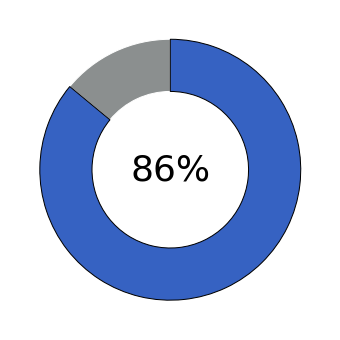

In [174]:
goal = 4000
current = total_km_year
percent = int(current*100/goal)

fig, ax = plt.subplots(figsize=(6, 6))
data = [100-percent, percent]
wedgeprops = {'width':0.4, 'edgecolor':'black', 'lw':1}
patches, _ = ax.pie(data, wedgeprops=wedgeprops, startangle=90, colors=['#8b8f8f', '#3662c2'])
# ax.pie(data, wedgeprops=wedgeprops, startangle=90, colors=['#8b8f8f', '#3662c2'])
patches[0].set_zorder(1)
patches[0].set_edgecolor('white')
# plt.title('Goal for 2022', fontsize=30, loc='center', font='Sans Serif')
plt.text(0, 0, f"{data[1]}%", ha='center', va='center', fontsize=36, font='Sans Serif')
plt.show()

<br><br>

# Kilometers per year

In [26]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
km_per_year = df[
    ['Year', 'Distance']
    ].groupby(df['Year']
    ).agg({'Year': 'mean', 'Distance': 'sum'}
    )
# km_per_year.iloc[::-1].drop('Year', axis=1)
km_per_year

,Year,Distance
Year,,
2012,2012.0,59.25
2014,2014.0,1226.46
2015,2015.0,896.64
2016,2016.0,1006.86
2017,2017.0,2124.19
2018,2018.0,5670.12
2019,2019.0,5034.08
2020,2020.0,7505.82
2021,2021.0,6703.34


In [7]:
km_per_year.dtypes

Year        float64
Distance    float64
dtype: object

In [27]:
alt.Chart(km_per_year).mark_bar(color='darkblue').encode(
    x='Year:O',
    y='Distance:Q',
    tooltip=['Distance', 'Year']
).configure_axis(
    grid=False
).properties(
    width=600,
    height=300
).interactive()

alt.Chart(...)

# Kilometers per month each year

In [56]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

km_per_month = df[
    ['Month', 'Distance']
    ].groupby(df['Month']
    ).agg({'Distance': 'sum'}
    )
km_per_month
# km_per_year.iloc[::-1].drop('Year', axis=1)

,Distance
Month,
April,3800.30
August,3423.57
December,960.28
February,2086.58
January,1575.60
July,5077.28
June,2768.75
March,2832.13
May,4056.89


# Longest rides

In [9]:
df['Date_dt'] = pd.to_datetime(df['Date']).dt.date
# longest rides
longest_rides = df[['Date', 'Title', 'Distance']
                  ].sort_values('Distance', ascending=False).reset_index().head(10)

longest_rides.index += 1

longest_rides

,index,Date,Title,Distance
1,134,2021-07-23 04:08:00,Klínovec Klassics #solo #unsupported,313.64
2,283,2020-06-06 07:22:00,11 + 12 💯 Ještěd Fondo,261.73
3,492,2018-06-22 08:34:00,na Ještěd a zpět s Vodou,248.33
4,462,2018-10-13 07:12:00,Praha - Rokycany - Praha (vysílač) - Příbram -...,210.63
5,107,2021-09-28 09:17:00,18.+19.💯 #SBCR kopečky challenge,204.41
6,268,2020-07-17 09:10:00,16.+17. 💯Passo Stelvio+Gavia+Tonale+Mendola a ...,200.32
7,145,2021-06-19 04:10:00,Klínovec Klassics,180.27
8,272,2020-07-06 10:18:00,14. 💯 Pražské kolo,172.07
9,247,2020-09-28 08:38:00,25. 💯 Hon VKP v psím počasí,169.01
10,171,2021-04-18 11:00:00,2.💯 5x VKP a pořádná testovačka,167.08


In [10]:
df

,Unnamed: 0,Activity_Type,Date,Title,Distance,Calories,Time,Avg_HR,Max_HR,Aerobic_TE,Avg_Speed,Max_Speed,Total_Ascent,Total_Descent,Avg_Cadence,Max_Cadence,Normalized_Power,Training_Stress_Score,Max_Avg_Power(20min),Avg_Power,Max_Power,Total_Strokes,Min_Temp,Moving_Time,Elapsed_Time,Min_Elevation,Max_Elevation,Bike,Date_dt
0,0,Gravel/Unpaved Cycling,2022-10-01 10:09:00,Gravel series Ralsko,58.96,2657.0,0 days 03:03:06,167,186,5.0,19.3,53.0,681,658,0,0,0,0.0,0,0,0,0,8.0,0 days 03:02:28,0 days 03:08:45,266,406,Bergamont,2022-10-01
1,1,Gravel/Unpaved Cycling,2022-09-25 12:22:00,Prague Gravel/Unpaved Cycling,41.42,875.0,0 days 01:57:34,114,149,2.0,21.1,37.9,108,105,0,0,0,0.0,0,0,0,0,16.0,0 days 01:57:02,0 days 03:04:31,197,219,Bergamont,2022-09-25
2,2,Gravel/Unpaved Cycling,2022-09-23 15:30:00,Prague Gravel/Unpaved Cycling,53.22,1353.0,0 days 02:10:29,140,171,3.6,24.5,50.5,364,354,0,0,0,0.0,0,0,0,0,12.0,0 days 02:10:04,0 days 02:23:13,198,393,Bergamont,2022-09-23
3,3,Gravel/Unpaved Cycling,2022-09-16 10:30:00,Lov VKP a Francouzská cyklojízda,104.10,3339.0,0 days 05:03:04,149,181,5.0,20.6,55.0,1664,1662,0,0,0,0.0,0,0,0,0,12.0,0 days 05:02:00,0 days 05:51:51,194,509,Bergamont,2022-09-16
4,4,Gravel/Unpaved Cycling,2022-09-04 14:07:00,Praha - Kotce,104.80,2744.0,0 days 04:11:44,150,183,5.0,25.0,51.0,755,929,0,0,0,0.0,0,0,0,0,20.0,0 days 04:11:00,0 days 04:37:56,170,382,Bergamont,2022-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,754,Cycling,2012-07-29 10:16:00,Černá Hora circle,34.00,139.0,0 days 02:24:53,150,179,0.0,14.1,55.8,1184,1215,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012-07-29
755,755,Cycling,2012-07-09 19:46:00,Berghaus,14.24,859.0,0 days 01:54:10,0,0,0.0,7.5,49.9,408,683,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012-07-09
756,756,Cycling,2012-07-05 09:08:00,Z chaty do Monkey Parku,1.57,116.0,0 days 00:06:40,0,0,0.0,14.2,17.6,49,13,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012-07-05
757,757,Cycling,2012-07-04 20:08:00,Z Horizontu do chaty,1.67,76.0,0 days 00:03:24,0,0,0.0,29.5,60.1,42,83,0,0,0,0.0,0,0,0,0,0.0,0 days 00:00:00,0 days 00:00:00,0,0,unknown,2012-07-04


# Activity types

In [10]:
activity_type = df[
    ['Activity_Type', 'Distance']].assign(amount_of_rides=1
    ).groupby(df['Activity_Type']
    ).agg({'amount_of_rides': 'sum', 'Distance': 'sum'})
# activity_type.reset_index()

In [11]:
activity_type

,amount_of_rides,Distance
Activity_Type,,
Cycling,78,997.30
Gravel/Unpaved Cycling,73,3726.08
Indoor Cycling,109,3062.73
Mountain Biking,206,7667.33
Road Cycling,213,15768.26
Virtual Cycling,83,2463.12


In [38]:
activity_type.to_csv('activity_types.csv')
activities = pd.read_csv('activity_types.csv')

In [40]:
alt.Chart(activities).mark_bar(color='darkred').encode(
    x='Activity_Type:N',
    y='Distance:Q',
    tooltip=['Distance', 'Activity_Type']
).configure_axis(
    grid=False
).properties(
    width=600,
    height=300
).interactive()

alt.Chart(...)

<br><br>

# Bike usage

In [29]:
bike_usage = df[
    ['Bike', 'Distance']].assign(amount_of_rides=1
    ).groupby(df['Bike']
    ).agg({'amount_of_rides': 'sum', 'Distance': 'sum'})


In [30]:
bike_usage

,amount_of_rides,Distance
Bike,,
Bergamont,73,3726.08
Rockhopper,206,7667.33
Roubaix,213,15768.26
Tacx,192,5525.85
unknown,78,997.30


In [31]:
bike_usage.to_csv('bike_usage.csv')
usage = pd.read_csv('bike_usage.csv')

In [44]:
alt.Chart(usage).mark_bar(color='darkgreen').encode(
    alt.X('Bike:N'),
    y='Distance:Q',
    tooltip=['Distance', 'Bike:O']
).configure_axis(
    grid=False
).properties(
    width=600,
    height=300
).interactive()

alt.Chart(...)

In [19]:
bike_usage.index

Index(['Bergamont', 'Rockhopper', 'Roubaix', 'Tacx', 'unknown'], dtype='object', name='Bike')

In [28]:
alt.Chart(bike_usage).mark_bar().encode(
    alt.X('amount_of_rides:N'),
    y='Distance:Q',
    tooltip=['Distance', 'Bike:O']
).properties(
    width=600,
    height=300
).interactive(
# ).transform_bin(
#     'amount_of_rides', field='Bike'
)

NameError: name 'bike_usage' is not defined

In [35]:
df['year'] = df['Date'].dt.year

In [44]:
df2022 = df[df['year'] == 2022]

In [45]:
df2022

,Unnamed: 0,Activity_Type,Date,Title,Distance,Calories,Time,Avg_HR,Max_HR,Aerobic_TE,Avg_Speed,Max_Speed,Total_Ascent,Total_Descent,Avg_Cadence,Max_Cadence,Normalized_Power,Training_Stress_Score,Max_Avg_Power(20min),Avg_Power,Max_Power,Total_Strokes,Min_Temp,Moving_Time,Elapsed_Time,Min_Elevation,Max_Elevation,Bike,Date_dt,year
0,0,Gravel/Unpaved Cycling,2022-10-01 10:09:00,Gravel series Ralsko,58.96,2657.0,0 days 03:03:06,167,186,5.0,19.3,53.0,681,658,0,0,0,0.0,0,0,0,0,8.0,0 days 03:02:28,0 days 03:08:45,266,406,Bergamont,2022-10-01,2022
1,1,Gravel/Unpaved Cycling,2022-09-25 12:22:00,Prague Gravel/Unpaved Cycling,41.42,875.0,0 days 01:57:34,114,149,2.0,21.1,37.9,108,105,0,0,0,0.0,0,0,0,0,16.0,0 days 01:57:02,0 days 03:04:31,197,219,Bergamont,2022-09-25,2022
2,2,Gravel/Unpaved Cycling,2022-09-23 15:30:00,Prague Gravel/Unpaved Cycling,53.22,1353.0,0 days 02:10:29,140,171,3.6,24.5,50.5,364,354,0,0,0,0.0,0,0,0,0,12.0,0 days 02:10:04,0 days 02:23:13,198,393,Bergamont,2022-09-23,2022
3,3,Gravel/Unpaved Cycling,2022-09-16 10:30:00,Lov VKP a Francouzská cyklojízda,104.10,3339.0,0 days 05:03:04,149,181,5.0,20.6,55.0,1664,1662,0,0,0,0.0,0,0,0,0,12.0,0 days 05:02:00,0 days 05:51:51,194,509,Bergamont,2022-09-16,2022
4,4,Gravel/Unpaved Cycling,2022-09-04 14:07:00,Praha - Kotce,104.80,2744.0,0 days 04:11:44,150,183,5.0,25.0,51.0,755,929,0,0,0,0.0,0,0,0,0,20.0,0 days 04:11:00,0 days 04:37:56,170,382,Bergamont,2022-09-04,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,Indoor Cycling,2022-01-23 16:39:00,BORA-hansgrohe | WO 01-03 | 2019 | fat metabol...,46.08,867.0,0 days 01:30:00,141,157,0.0,30.7,32.4,0,0,69,87,164,61.4,172,161,320,0,0.0,0 days 01:29:59,0 days 01:30:00,0,0,Tacx,2022-01-23,2022
73,73,Indoor Cycling,2022-01-21 17:13:00,SEG W2-T1 VO2max,32.58,644.0,0 days 01:03:00,124,187,0.0,31.0,38.9,0,0,67,79,203,66.0,211,170,332,0,0.0,0 days 01:03:00,0 days 01:03:00,0,0,Tacx,2022-01-21,2022
74,74,Indoor Cycling,2022-01-19 17:00:00,SEG W1-T1 VO2max,28.62,551.0,0 days 00:56:00,141,179,0.0,30.7,38.7,0,0,68,83,194,53.6,209,164,323,0,0.0,0 days 00:56:00,0 days 00:56:00,0,0,Tacx,2022-01-19,2022
75,75,Indoor Cycling,2022-01-09 18:17:00,VTC Astana: Spin the legs,24.94,471.0,0 days 00:49:00,136,149,0.0,30.5,32.2,0,0,68,84,163,33.0,174,160,251,0,0.0,0 days 00:48:54,0 days 00:49:00,0,0,Tacx,2022-01-09,2022


In [46]:
df2022.drop(columns=['year']).set_index('Date')

,Unnamed: 0,Activity_Type,Title,Distance,Calories,Time,Avg_HR,Max_HR,Aerobic_TE,Avg_Speed,Max_Speed,Total_Ascent,Total_Descent,Avg_Cadence,Max_Cadence,Normalized_Power,Training_Stress_Score,Max_Avg_Power(20min),Avg_Power,Max_Power,Total_Strokes,Min_Temp,Moving_Time,Elapsed_Time,Min_Elevation,Max_Elevation,Bike,Date_dt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-01 10:09:00,0,Gravel/Unpaved Cycling,Gravel series Ralsko,58.96,2657.0,0 days 03:03:06,167,186,5.0,19.3,53.0,681,658,0,0,0,0.0,0,0,0,0,8.0,0 days 03:02:28,0 days 03:08:45,266,406,Bergamont,2022-10-01
2022-09-25 12:22:00,1,Gravel/Unpaved Cycling,Prague Gravel/Unpaved Cycling,41.42,875.0,0 days 01:57:34,114,149,2.0,21.1,37.9,108,105,0,0,0,0.0,0,0,0,0,16.0,0 days 01:57:02,0 days 03:04:31,197,219,Bergamont,2022-09-25
2022-09-23 15:30:00,2,Gravel/Unpaved Cycling,Prague Gravel/Unpaved Cycling,53.22,1353.0,0 days 02:10:29,140,171,3.6,24.5,50.5,364,354,0,0,0,0.0,0,0,0,0,12.0,0 days 02:10:04,0 days 02:23:13,198,393,Bergamont,2022-09-23
2022-09-16 10:30:00,3,Gravel/Unpaved Cycling,Lov VKP a Francouzská cyklojízda,104.10,3339.0,0 days 05:03:04,149,181,5.0,20.6,55.0,1664,1662,0,0,0,0.0,0,0,0,0,12.0,0 days 05:02:00,0 days 05:51:51,194,509,Bergamont,2022-09-16
2022-09-04 14:07:00,4,Gravel/Unpaved Cycling,Praha - Kotce,104.80,2744.0,0 days 04:11:44,150,183,5.0,25.0,51.0,755,929,0,0,0,0.0,0,0,0,0,20.0,0 days 04:11:00,0 days 04:37:56,170,382,Bergamont,2022-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-23 16:39:00,72,Indoor Cycling,BORA-hansgrohe | WO 01-03 | 2019 | fat metabol...,46.08,867.0,0 days 01:30:00,141,157,0.0,30.7,32.4,0,0,69,87,164,61.4,172,161,320,0,0.0,0 days 01:29:59,0 days 01:30:00,0,0,Tacx,2022-01-23
2022-01-21 17:13:00,73,Indoor Cycling,SEG W2-T1 VO2max,32.58,644.0,0 days 01:03:00,124,187,0.0,31.0,38.9,0,0,67,79,203,66.0,211,170,332,0,0.0,0 days 01:03:00,0 days 01:03:00,0,0,Tacx,2022-01-21
2022-01-19 17:00:00,74,Indoor Cycling,SEG W1-T1 VO2max,28.62,551.0,0 days 00:56:00,141,179,0.0,30.7,38.7,0,0,68,83,194,53.6,209,164,323,0,0.0,0 days 00:56:00,0 days 00:56:00,0,0,Tacx,2022-01-19


# Index of difficulty

In [25]:
df['Difficulty_index'] = df['Total_Ascent'] / df['Distance'] / 10

In [35]:
Difficulty = df[
    ['Activity_Type', 'Date', 'Title','Distance', 'Time', 'Total_Ascent', 'Bike', 'Difficulty_index']
].sort_values('Difficulty_index', ascending=False).round(3)

Difficulty.head(20)

,Activity_Type,Date,Title,Distance,Time,Total_Ascent,Bike,Difficulty_index
657,Mountain Biking,2015-09-13 15:27:00,S Martinem,3.42,0 days 00:20:52,191,Rockhopper,5.585
504,Road Cycling,2018-05-06 16:54:00,zbytek do Caldara,11.30,0 days 01:00:00,450,Roubaix,3.982
659,Mountain Biking,2015-08-28 16:06:00,Pec pod Sněžkou,18.53,0 days 01:25:55,714,Rockhopper,3.853
627,Mountain Biking,2016-09-20 11:54:00,Passo della Mendola - Penegal,41.41,0 days 03:13:33,1522,Rockhopper,3.675
53,Virtual Cycling,2022-03-03 17:42:00,TotalEnergies - Port de Tudons,26.85,0 days 01:17:36,982,Tacx,3.657
754,Cycling,2012-07-29 10:16:00,Černá Hora circle,34.00,0 days 02:24:53,1184,unknown,3.482
582,Mountain Biking,2017-08-13 16:35:00,Monticolo - Caldaro,12.02,0 days 01:00:20,418,Rockhopper,3.478
487,Road Cycling,2018-07-12 10:10:00,Selva di Val Gardena Nekategorizováno,105.33,0 days 06:55:59,3659,Roubaix,3.474
758,Cycling,2012-07-04 13:24:00,Okolo Pece,7.77,0 days 00:53:17,269,unknown,3.462
628,Mountain Biking,2016-09-19 12:44:00,Castelrotto zpět,14.04,0 days 00:58:46,485,Rockhopper,3.454


# Select year

In [119]:
list_of_years = df['Year'].drop_duplicates().values.tolist()

In [125]:
list_of_years

[2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [133]:
list_of_years.append(list_of_years)

In [136]:
from pprint import pprint
pprint(list_of_years)

[2012,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 <Recursion on list with id=1511123810112>]


In [109]:
selection = df[['Year', 'Month', 'Month_num', 'Distance']]
selection.set_index('Month', inplace=True)
selection

,Year,Month_num,Distance
Month,,,
October,2022,10,41.90
October,2022,10,13.75
October,2022,10,13.45
October,2022,10,58.96
September,2022,9,41.42
...,...,...,...
July,2012,7,34.00
July,2012,7,14.24
July,2012,7,1.57


In [110]:
selection_grouped = selection.groupby(
    ['Month','Year']
).agg({'Distance': 'sum'})

selection_grouped.reset_index(inplace=True)
selection_grouped

# selection_grouped.sort_values(['Year', 'Month_num'])

,Month,Year,Distance
0,April,2014,41.41
1,April,2016,28.11
2,April,2017,300.23
3,April,2018,616.76
4,April,2019,399.54
...,...,...,...
83,September,2018,665.25
84,September,2019,503.29
85,September,2020,770.17
86,September,2021,738.81


In [111]:
year2022 = selection_grouped['Year'] == 2022
year2021 = selection_grouped['Year'] == 2021
year2020 = selection_grouped['Year'] == 2020
year2019 = selection_grouped['Year'] == 2019

In [132]:
df_super = selection_grouped[
    year2022 | year2021
]

df_super

,Month,Year,Distance
6,April,2021,842.83
7,April,2022,521.09
15,August,2021,686.10
16,August,2022,406.80
20,December,2021,128.96
24,February,2021,320.09
25,February,2022,541.74
30,January,2021,370.62
31,January,2022,172.54
40,July,2021,951.54


In [131]:
selection_grouped.query('Year == 2022 | Year == 2021')

,Month,Year,Distance
6,April,2021,842.83
7,April,2022,521.09
15,August,2021,686.10
16,August,2022,406.80
20,December,2021,128.96
24,February,2021,320.09
25,February,2022,541.74
30,January,2021,370.62
31,January,2022,172.54
40,July,2021,951.54


In [113]:
df_super.pivot_table('Distance', 'Month', 'Year', aggfunc='sum')

Year,2019,2020,2021,2022
Month,,,,
April,399.54,1050.33,842.83,521.09
August,556.12,498.07,686.10,406.80
December,132.20,467.66,128.96,NaN
February,489.96,342.16,320.09,541.74
January,336.40,329.58,370.62,172.54
July,504.37,1080.41,951.54,528.45
June,82.32,702.38,686.90,NaN
March,425.76,687.54,452.21,559.40
May,662.20,777.10,791.79,271.58


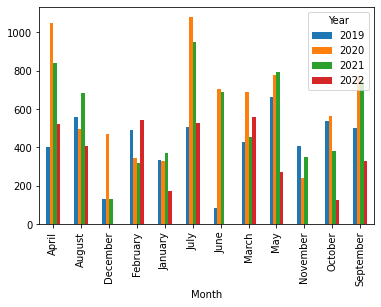

In [114]:
df_super.pivot_table('Distance', 'Month', 'Year', aggfunc='sum').plot.bar();

In [115]:
df_final = selection.groupby(
    [
        'Year', 
        'Month', 
        'Month_num'
    ]
).agg({'Distance': 'sum'})

df_final.sort_values(['Year', 'Month_num'])

Distance
Year Month     Month_num          
2012 July      7             59.25
2014 April     4             41.41
     May       5            290.55
     June      6            133.09
     July      7            219.36
...                            ...
2022 May       5            271.58
     July      7            528.45
     August    8            406.80
     September 9            328.40
     October   10           128.06

[88 rows x 1 columns]

In [116]:
alt.Chart(df_final).mark_bar().encode(
        x='Month:N',
        y=alt.Y('sum(Distance):Q', scale=alt.Scale(zero=False)),
        color='Year:N',
        # column=
#         opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
#     ).add_selection(
#         selection
    )

ValueError: Hierarchical indices not supported

alt.Chart(...)